# Demystifying Neural Networks 

---

# The Perceptron

Or Neuron, is the basic building block of the ANN.
The general idea is that one can define any
linear relationship (in as many dimensions as one may see fit) by:
perturbing every input (dimension), summing the results,
and applying a normalizing (activation) function.

By convention we note the actual input (features of the data)
as $x_n$ (or $\vec{x}$) and the input perturbation - or *weights* - $w_n$
(or $\vec{w}$).  By slightly changing the weights we can reach an
appropriate result (or model) to out data.



<div style="text-align:right;font-size:0.7em;">perceptron.svg</div>

Above we have a plane separating three dimensional space.
We can write the above perceptron as:

$$
\vec{w} = [w_1, w_2, w_3] \\
\vec{x} = [x_1, x_2, x_3] \\
f = \tanh \\
\hat{y} = f(\vec{w} \cdot \vec{x} + w_0) = f(w_1x_1 + w_2x_2 + w_3x_3 + w_0)
$$

We will be using the hyperbolic tangent ($tanh$) as the activation function.
$tanh$ has the nice property of always being between $-1$ and $1$.
It's equation is:

$$
\tanh (x) = \frac{e^{2x} + 1}{e^{2x} - 1}
$$

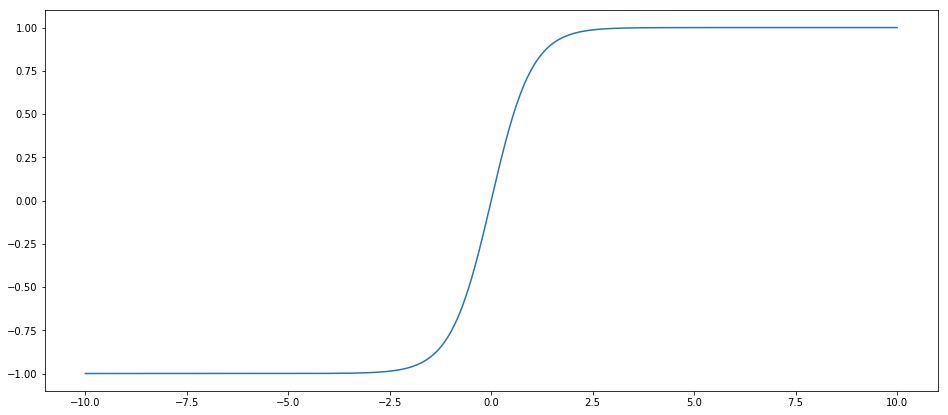

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1024)
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(x, np.tanh(x));

## The ANN

For relationships that are not linear we can connect several perceptron together.
Making several layers of perceptrons we allow for combinations of linear relationships,
which then become non-linear.  Below every circle represents the full perceptron,
including the summation and activation function.
In an ANN we often call these perceptrons neurons.

The difficult bit becomes finding the correct weights ($w_n$) for our data.
We will ignore the idea of finding the correct weights for now,
we will assume that we know the correct weights and concentrate on the implementation.



<div style="text-align:right;font-size:0.7em;">ann.svg</div>

The above network takes two dimensional input and outputs two dimensional output.
Let's say that we have the input as
$\vec{x} = [3, 7]$ i.e. $ID_1 = x_1 = 3$ and $ID_2 = x_2 = 7$.
Now we will try to figure out what is the input to the three neurons in the first layer.

$$
\text{Neuron 1} = 3 w_{11} + 7 w_{21} + w_{01} \\
\text{Neuron 2} = 3 w_{12} + 7 w_{22} + w_{02} \\
\text{Neuron 3} = 3 w_{13} + 7 w_{23} + w_{03}
$$

Now, if we remind ourselves of matrix multiplication and notice that
($W$ and $W_B$ come from the image above):

$$
W \cdot \vec{x} + W_B =
\left[
\begin{matrix}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23} \\
\end{matrix}
\right] \left[
\begin{matrix}
3 \\
7 \\
\end{matrix}
\right] + \left[
\begin{matrix}
w_{01} \\
w_{02} \\
w_{03} \\
\end{matrix}
\right] = \left[
\begin{matrix}
3 w_{11} + 7 w_{21} + w_{01} \\
3 w_{12} + 7 w_{22} + w_{02} \\
3 w_{13} + 7 w_{23} + w_{03}
\end{matrix}
\right]
$$

And that result is a three dimensional vector.
We can then apply the activation function (here $\tanh$)
and thave the output of the first layer.
We can then write the output of the second layer as:

$$
f(W' \cdot f(W \cdot \vec{x} + W_B) + W'_B)
$$

And the full network is evaluated by computing:

$$
\hat{\vec{y}} = f(W'' \cdot f(W' \cdot f(W \cdot \vec{x} + W_B) + W'_B) + W''_B)
$$

In summary, **a neural network is just a sequence of matrix operations**.
If there is one thing that you will get out of this workshop is this specific idea.
The circles in the picture above DO NOT EXIST below the hood in the ANN implementation!
Th combination of circles and weights on arrows is just a representation of matrices
that more-or-less look like a linear connection of neurons.
The popular circle and arrow conceptual representation is accurate
but it is only that: a conceptual representation that links the matrices
to a neural analogy.